<a href="https://colab.research.google.com/github/materokatti/machine_learning_study/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1}$$

## Tools

In [3]:
# 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt

## Code

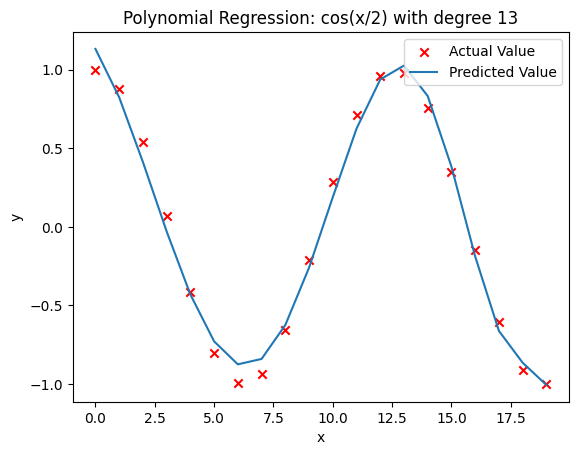

In [4]:
# z-score 정규화 함수 정의
def zscore_normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# 선형 회귀 + 그래디언트 디센트 구현
def run_gradient_descent_feng(X, y, iterations=1000, alpha=1e-2):
    m, n = X.shape
    w = np.zeros(n)
    b = 0

    for i in range(iterations):
        y_hat = X @ w + b
        error = y_hat - y
        dj_dw = (1/m) * (X.T @ error)
        dj_db = (1/m) * np.sum(error)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

    return w, b

# 데이터 생성
x = np.arange(0, 20, 1)
y = np.cos(x / 2)

# 다항 특성 생성 (x ~ x^13)
X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]

# 정규화
X, mu, sigma = zscore_normalize_features(X)

# 모델 학습
model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha=1e-1)

# 예측값 계산
y_pred = X @ model_w + model_b

# 시각화
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.plot(x, y_pred, label="Predicted Value")
plt.title("Polynomial Regression: cos(x/2) with degree 13")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()